# Chua Circuit: Chaos in Electronic Systems

## Introduction

The **Chua circuit** is the simplest electronic circuit that exhibits chaotic behavior. Designed by Leon O. Chua in 1983, it has become a paradigmatic example for studying chaos, bifurcations, and nonlinear dynamics in physical systems.

## Circuit Description

The Chua circuit consists of:
- Two capacitors ($C_1$ and $C_2$)
- One inductor ($L$)
- One linear resistor ($R$)
- One nonlinear resistor (Chua's diode)

## Mathematical Model

The circuit dynamics are governed by Kirchhoff's laws, yielding a system of three coupled nonlinear ordinary differential equations. In dimensionless form:

$$\frac{dx}{d\tau} = \alpha \left[ y - x - f(x) \right]$$

$$\frac{dy}{d\tau} = x - y + z$$

$$\frac{dz}{d\tau} = -\beta y$$

where $x$, $y$, and $z$ represent the voltages across $C_1$, $C_2$, and the current through $L$, respectively.

## Chua's Diode Characteristic

The nonlinear element $f(x)$ is the piecewise-linear characteristic of Chua's diode:

$$f(x) = m_1 x + \frac{1}{2}(m_0 - m_1)\left[ |x + 1| - |x - 1| \right]$$

This can be rewritten as:

$$f(x) = \begin{cases}
m_1 x + (m_0 - m_1) & \text{if } x \leq -1 \\
m_0 x & \text{if } |x| < 1 \\
m_1 x - (m_0 - m_1) & \text{if } x \geq 1
\end{cases}$$

where $m_0$ and $m_1$ are the slopes of the inner and outer segments, respectively.

## Parameters

The dimensionless parameters are:
- $\alpha = \frac{C_2}{C_1}$ (capacitance ratio)
- $\beta = \frac{C_2 R^2}{L}$ (related to inductance)

Typical values for chaotic behavior: $\alpha \approx 15.6$, $\beta \approx 28$, $m_0 \approx -8/7$, $m_1 \approx -5/7$.

In [1]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Chua's diode nonlinearity
def chua_diode(x, m0, m1):
    """Piecewise-linear characteristic of Chua's diode."""
    return m1 * x + 0.5 * (m0 - m1) * (np.abs(x + 1) - np.abs(x - 1))

# Chua circuit ODEs
def chua_circuit(t, state, alpha, beta, m0, m1):
    """Chua circuit differential equations."""
    x, y, z = state
    
    dxdt = alpha * (y - x - chua_diode(x, m0, m1))
    dydt = x - y + z
    dzdt = -beta * y
    
    return [dxdt, dydt, dzdt]

# Parameters for chaotic behavior (double scroll attractor)
alpha = 15.6
beta = 28.0
m0 = -8/7
m1 = -5/7

# Initial conditions
x0 = 0.7
y0 = 0.0
z0 = 0.0
state0 = [x0, y0, z0]

# Time span
t_span = (0, 100)
t_eval = np.linspace(t_span[0], t_span[1], 50000)

# Solve the system
solution = solve_ivp(
    chua_circuit,
    t_span,
    state0,
    args=(alpha, beta, m0, m1),
    method='RK45',
    t_eval=t_eval,
    rtol=1e-8,
    atol=1e-10
)

x, y, z = solution.y
t = solution.t

print(f"Integration successful: {solution.success}")
print(f"Number of time steps: {len(t)}")

Integration successful: True
Number of time steps: 50000


## The Double Scroll Attractor

The Chua circuit is famous for producing the **double scroll attractor**, a strange attractor with a distinctive shape resembling two scrolls connected at a saddle point. This attractor demonstrates:

1. **Sensitivity to initial conditions** (butterfly effect)
2. **Bounded but non-periodic trajectories**
3. **Fractal structure**

The system switches chaotically between orbiting the two unstable fixed points, creating the characteristic double-scroll pattern.

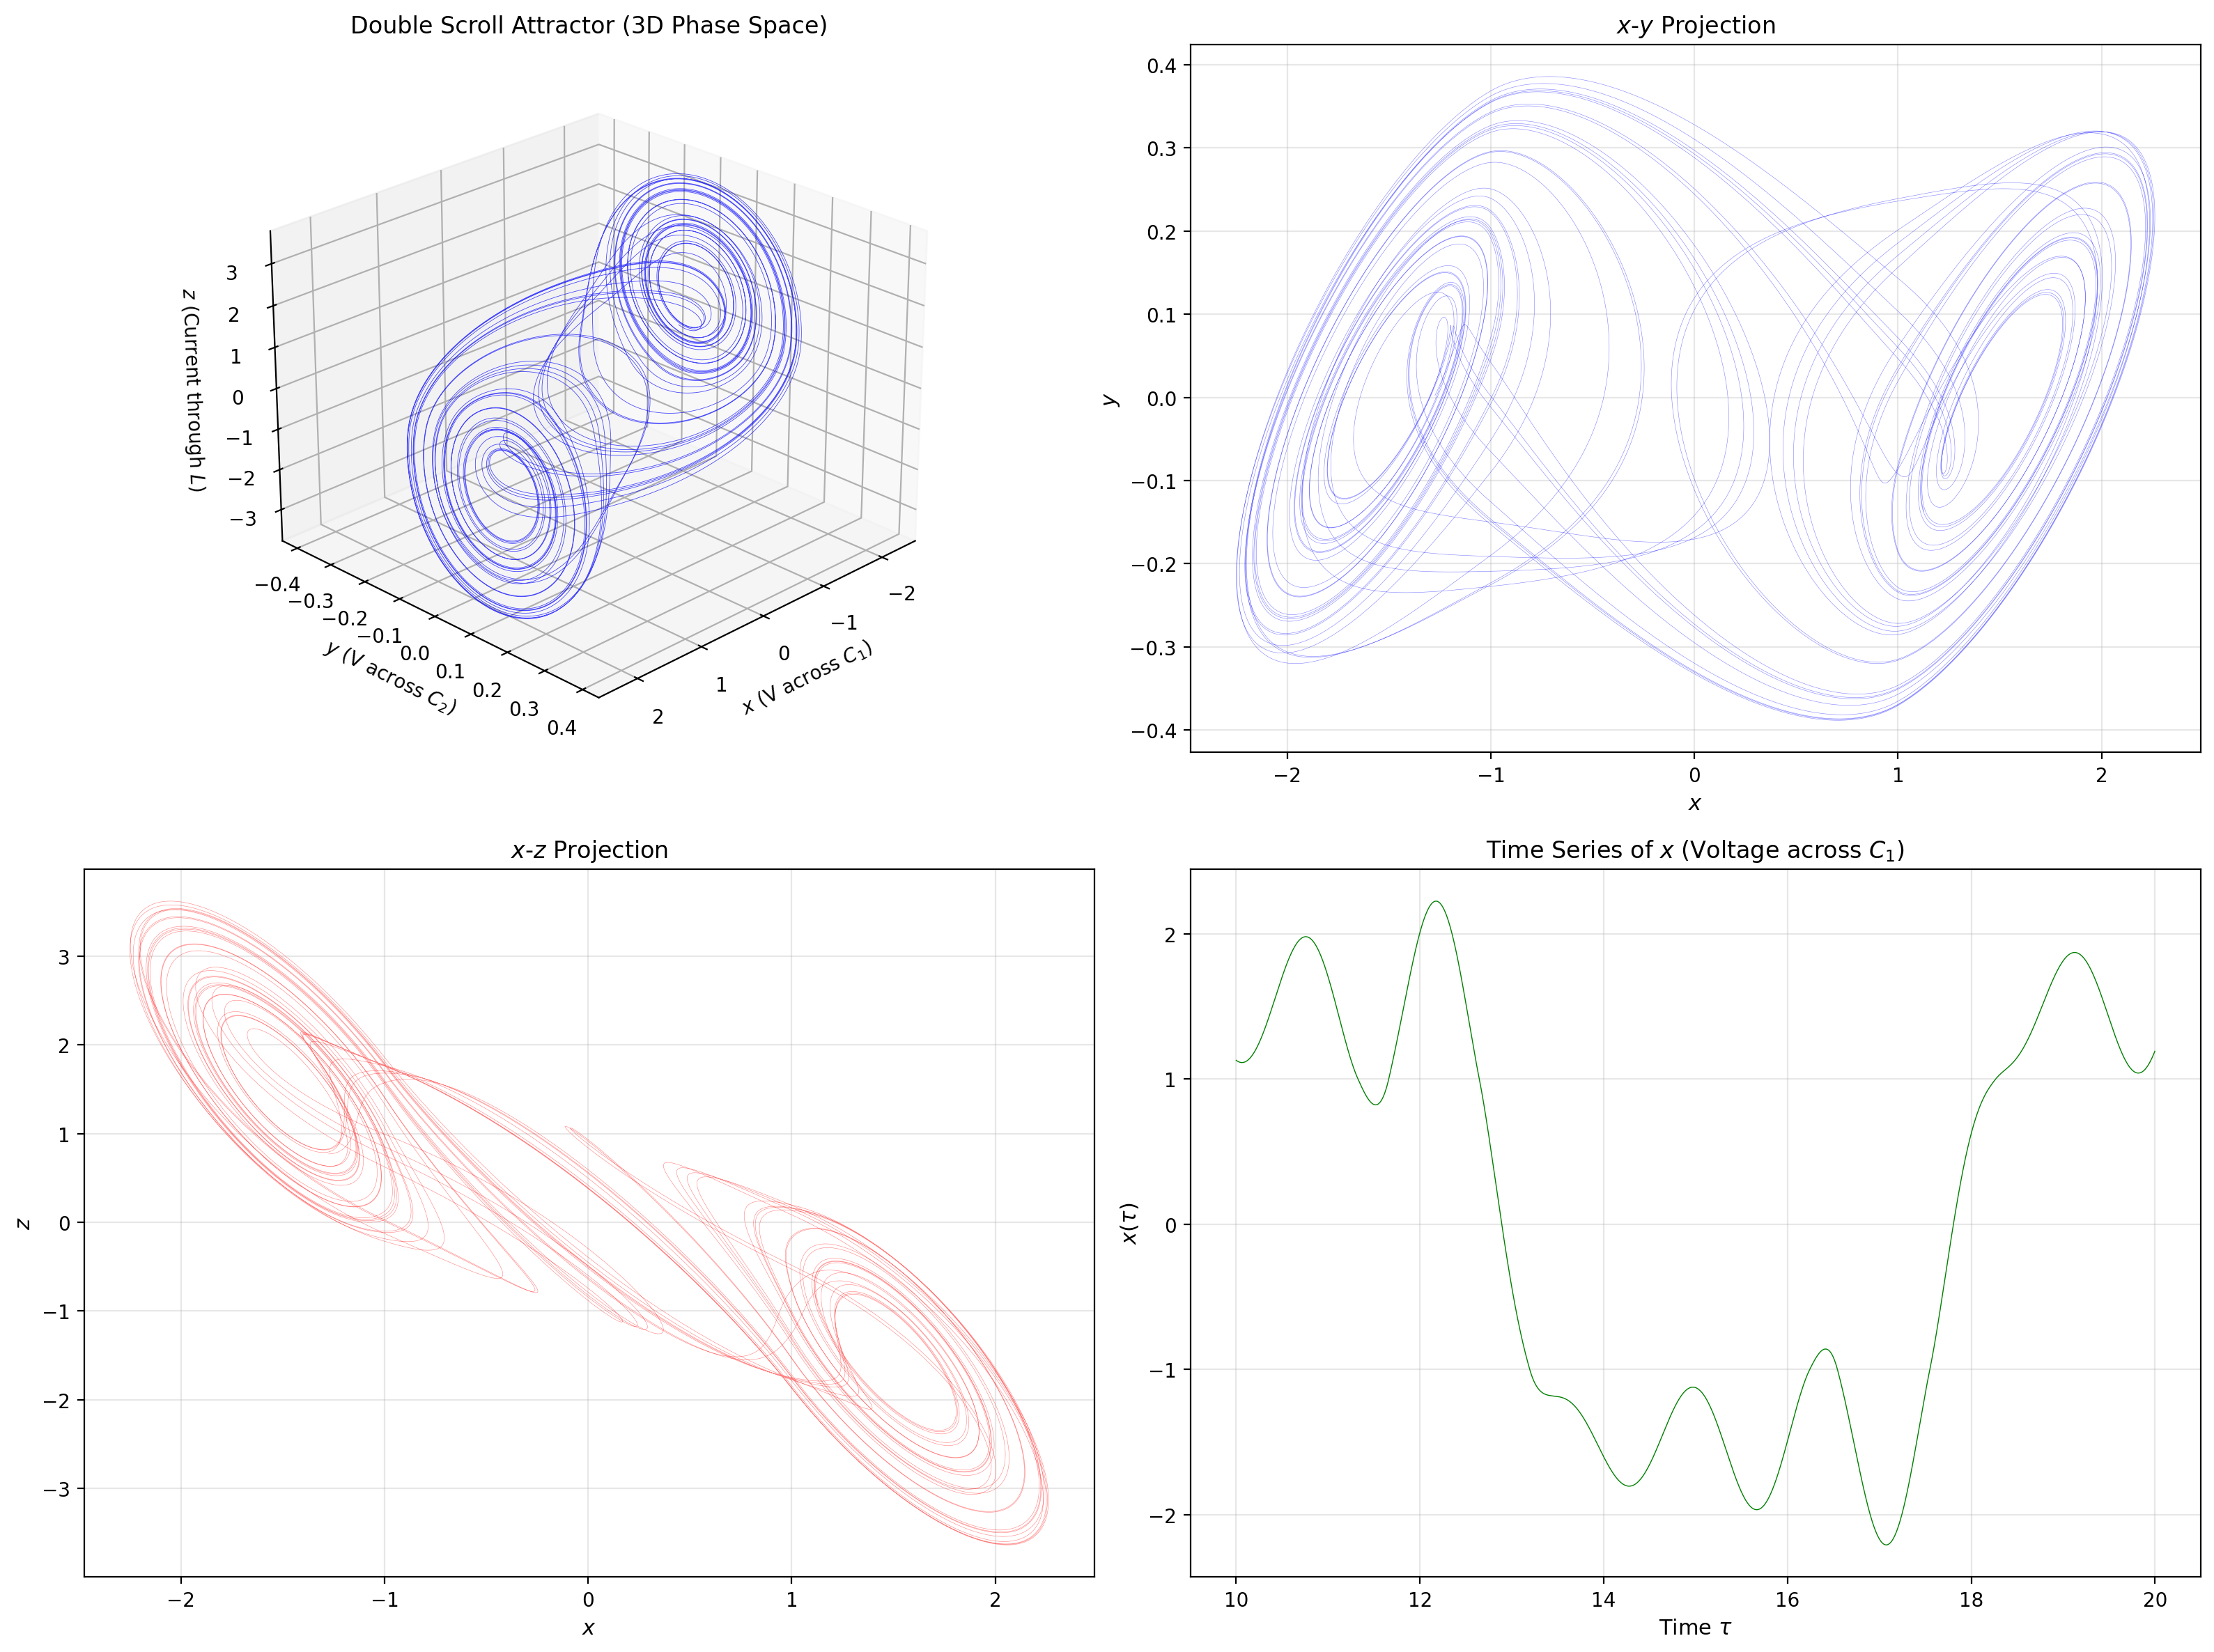


Plot saved to 'plot.png'


In [2]:
# Create visualization
fig = plt.figure(figsize=(16, 12))

# 3D phase space plot
ax1 = fig.add_subplot(221, projection='3d')
# Use transient removal - skip first 10% of data
skip = len(t) // 10
ax1.plot(x[skip:], y[skip:], z[skip:], 'b-', linewidth=0.3, alpha=0.7)
ax1.set_xlabel('$x$ (V across $C_1$)', fontsize=10)
ax1.set_ylabel('$y$ (V across $C_2$)', fontsize=10)
ax1.set_zlabel('$z$ (Current through $L$)', fontsize=10)
ax1.set_title('Double Scroll Attractor (3D Phase Space)', fontsize=12)
ax1.view_init(elev=25, azim=45)

# x-y projection
ax2 = fig.add_subplot(222)
ax2.plot(x[skip:], y[skip:], 'b-', linewidth=0.2, alpha=0.5)
ax2.set_xlabel('$x$', fontsize=11)
ax2.set_ylabel('$y$', fontsize=11)
ax2.set_title('$x$-$y$ Projection', fontsize=12)
ax2.grid(True, alpha=0.3)

# x-z projection
ax3 = fig.add_subplot(223)
ax3.plot(x[skip:], z[skip:], 'r-', linewidth=0.2, alpha=0.5)
ax3.set_xlabel('$x$', fontsize=11)
ax3.set_ylabel('$z$', fontsize=11)
ax3.set_title('$x$-$z$ Projection', fontsize=12)
ax3.grid(True, alpha=0.3)

# Time series of x
ax4 = fig.add_subplot(224)
t_plot = t[skip:skip+5000]
x_plot = x[skip:skip+5000]
ax4.plot(t_plot, x_plot, 'g-', linewidth=0.5)
ax4.set_xlabel('Time $\\tau$', fontsize=11)
ax4.set_ylabel('$x(\\tau)$', fontsize=11)
ax4.set_title('Time Series of $x$ (Voltage across $C_1$)', fontsize=12)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('chua_circuit_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Analysis: Chua's Diode Characteristic

Let's visualize the piecewise-linear I-V characteristic of Chua's diode, which is the source of nonlinearity in the circuit.

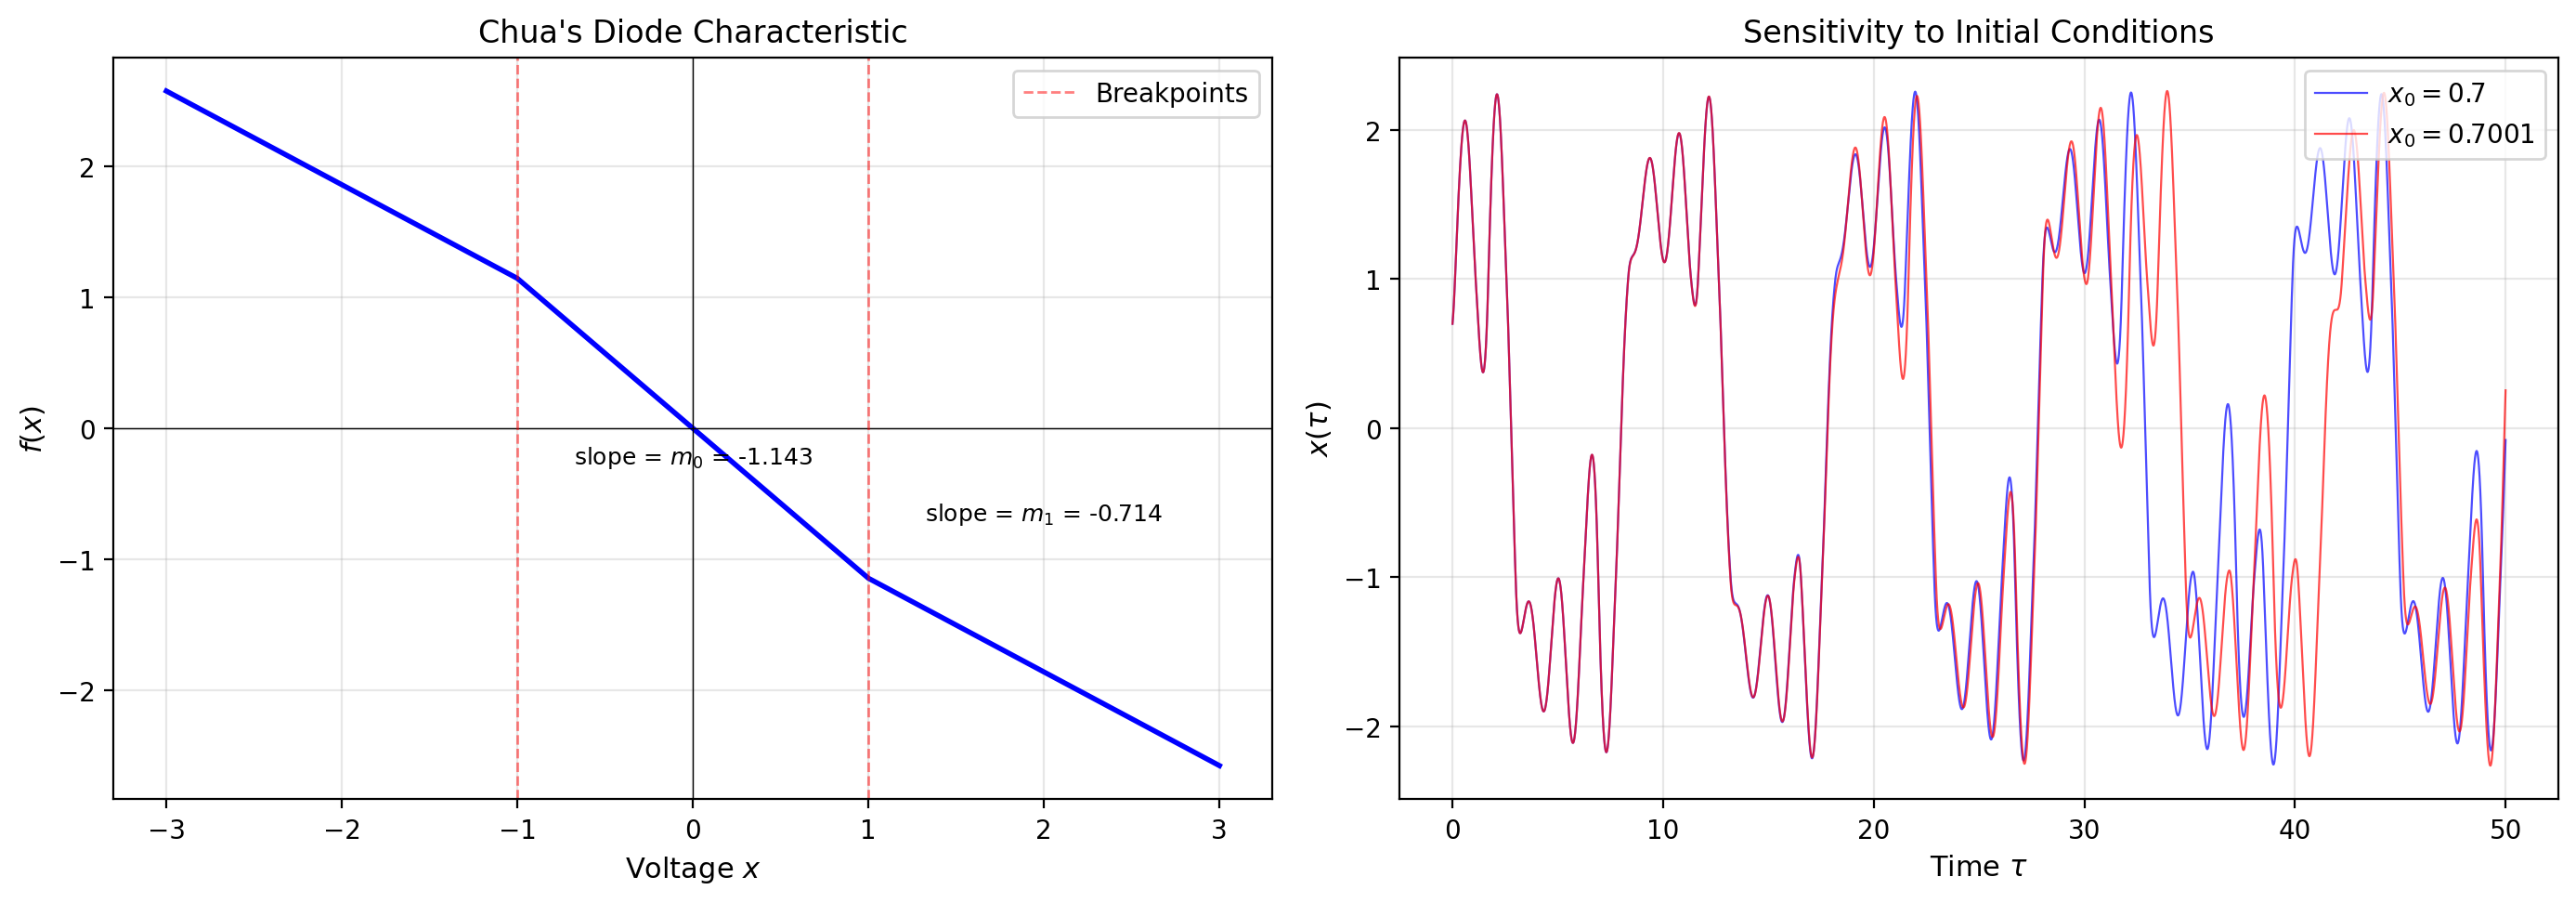


Initial separation: 0.0001
Final separation after τ=50: 0.3332
Amplification factor: 3331.8x


In [3]:
# Plot Chua's diode characteristic
x_diode = np.linspace(-3, 3, 1000)
f_diode = chua_diode(x_diode, m0, m1)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# I-V characteristic
ax1 = axes[0]
ax1.plot(x_diode, f_diode, 'b-', linewidth=2)
ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.axvline(x=-1, color='r', linestyle='--', linewidth=1, alpha=0.5, label='Breakpoints')
ax1.axvline(x=1, color='r', linestyle='--', linewidth=1, alpha=0.5)
ax1.set_xlabel('Voltage $x$', fontsize=11)
ax1.set_ylabel('$f(x)$', fontsize=11)
ax1.set_title("Chua's Diode Characteristic", fontsize=12)
ax1.grid(True, alpha=0.3)
ax1.legend()

# Annotate slopes
ax1.text(0, m0 * 0.5 + 0.3, f'slope = $m_0$ = {m0:.3f}', fontsize=9, ha='center')
ax1.text(2, m1 * 2 - (m0 - m1) + 0.3, f'slope = $m_1$ = {m1:.3f}', fontsize=9, ha='center')

# Sensitivity to initial conditions
ax2 = axes[1]

# Two trajectories with slightly different initial conditions
state0_a = [0.7, 0.0, 0.0]
state0_b = [0.7001, 0.0, 0.0]  # Tiny perturbation

t_short = np.linspace(0, 50, 10000)

sol_a = solve_ivp(chua_circuit, (0, 50), state0_a, 
                  args=(alpha, beta, m0, m1), t_eval=t_short, rtol=1e-8)
sol_b = solve_ivp(chua_circuit, (0, 50), state0_b, 
                  args=(alpha, beta, m0, m1), t_eval=t_short, rtol=1e-8)

ax2.plot(sol_a.t, sol_a.y[0], 'b-', linewidth=0.8, label='$x_0 = 0.7$', alpha=0.7)
ax2.plot(sol_b.t, sol_b.y[0], 'r-', linewidth=0.8, label='$x_0 = 0.7001$', alpha=0.7)
ax2.set_xlabel('Time $\\tau$', fontsize=11)
ax2.set_ylabel('$x(\\tau)$', fontsize=11)
ax2.set_title('Sensitivity to Initial Conditions', fontsize=12)
ax2.legend(loc='upper right')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compute divergence
divergence = np.abs(sol_a.y[0] - sol_b.y[0])
print(f"\nInitial separation: {abs(state0_a[0] - state0_b[0]):.4f}")
print(f"Final separation after τ=50: {divergence[-1]:.4f}")
print(f"Amplification factor: {divergence[-1] / abs(state0_a[0] - state0_b[0]):.1f}x")

## Bifurcation Analysis

The Chua circuit exhibits a rich bifurcation structure. As the parameter $\alpha$ varies, the system transitions through:

1. **Fixed points** (low $\alpha$)
2. **Limit cycles** (Hopf bifurcation)
3. **Period-doubling cascade**
4. **Chaos** (double scroll attractor)

Let's create a simple bifurcation diagram by varying $\alpha$.

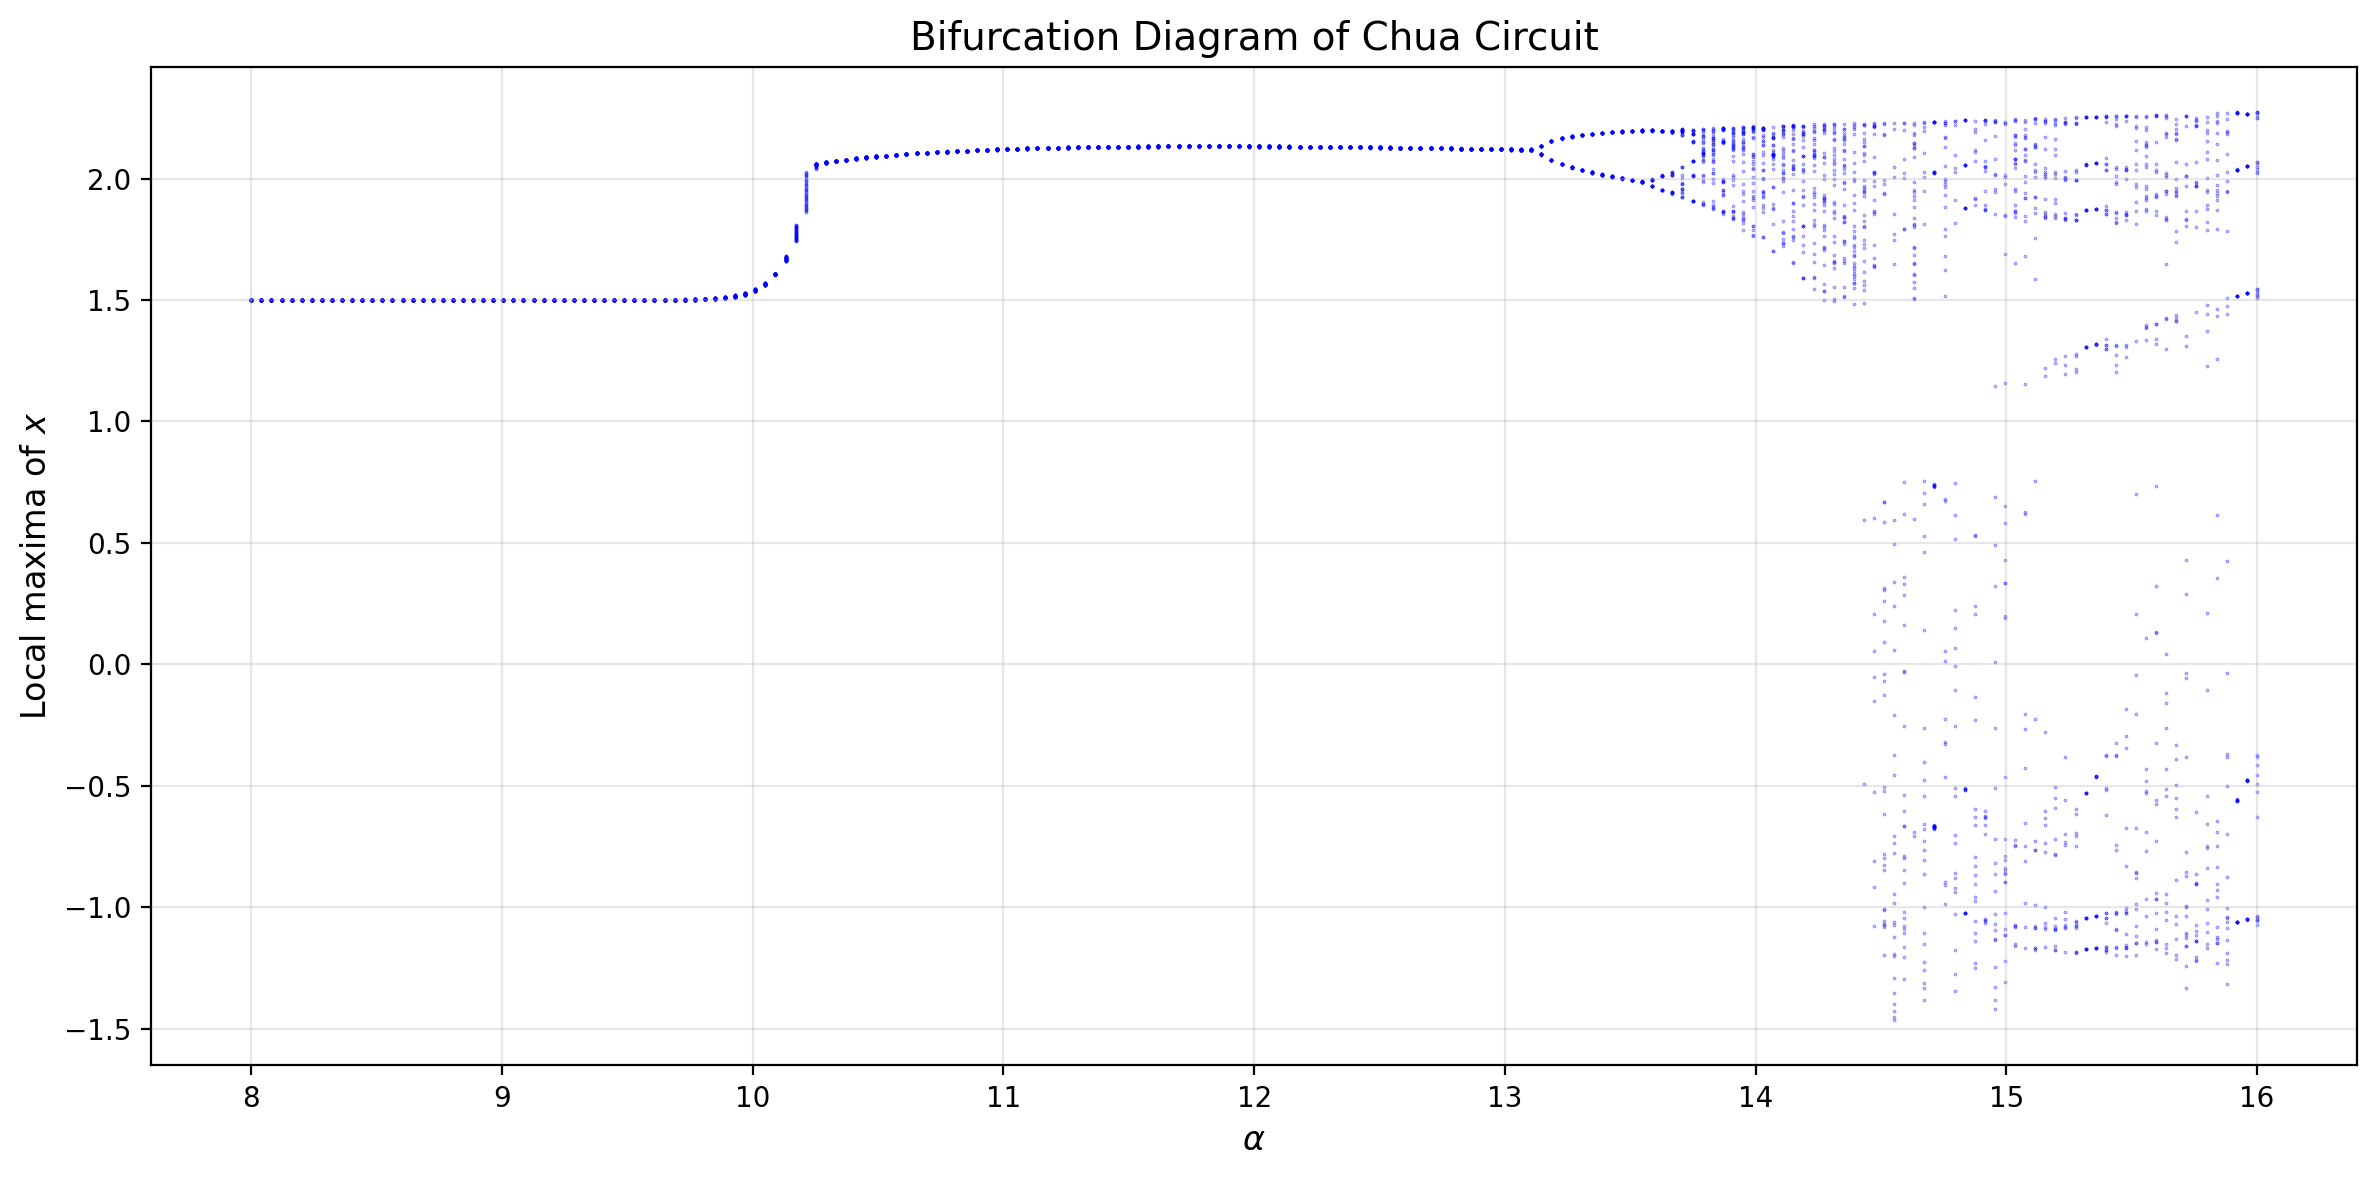


Bifurcation diagram shows route to chaos via period-doubling.


In [4]:
# Bifurcation diagram
alpha_values = np.linspace(8.0, 16.0, 200)
bifurcation_data = []

for alpha_val in alpha_values:
    # Integrate
    sol = solve_ivp(
        chua_circuit,
        (0, 200),
        [0.1, 0.0, 0.0],
        args=(alpha_val, beta, m0, m1),
        method='RK45',
        t_eval=np.linspace(150, 200, 2000),  # Discard transient
        rtol=1e-7
    )
    
    # Find local maxima of x
    x_vals = sol.y[0]
    maxima_idx = (np.diff(np.sign(np.diff(x_vals))) < 0).nonzero()[0] + 1
    maxima = x_vals[maxima_idx]
    
    # Store for plotting
    for m in maxima[-50:]:  # Last 50 maxima
        bifurcation_data.append((alpha_val, m))

# Plot bifurcation diagram
fig, ax = plt.subplots(figsize=(12, 6))

if bifurcation_data:
    alphas, maxima = zip(*bifurcation_data)
    ax.scatter(alphas, maxima, s=0.1, c='blue', alpha=0.5)

ax.set_xlabel('$\\alpha$', fontsize=12)
ax.set_ylabel('Local maxima of $x$', fontsize=12)
ax.set_title('Bifurcation Diagram of Chua Circuit', fontsize=14)
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\nBifurcation diagram shows route to chaos via period-doubling.")

## Lyapunov Exponent Estimation

The **Lyapunov exponent** quantifies the rate of separation of infinitesimally close trajectories. A positive largest Lyapunov exponent (LLE) is a signature of chaos.

For the Chua circuit with standard parameters, the LLE is approximately $\lambda_1 \approx 0.3$.

In [5]:
# Estimate largest Lyapunov exponent using trajectory divergence
def estimate_lyapunov(alpha, beta, m0, m1, dt=0.01, n_steps=10000, n_renorm=100):
    """Estimate largest Lyapunov exponent using tangent space method."""
    
    # Initial conditions
    state = np.array([0.1, 0.0, 0.0])
    perturbation = np.array([1e-8, 0.0, 0.0])
    
    lyap_sum = 0.0
    count = 0
    
    for _ in range(n_renorm):
        # Evolve both trajectories
        sol1 = solve_ivp(chua_circuit, (0, n_steps * dt), state,
                        args=(alpha, beta, m0, m1), method='RK45', rtol=1e-9)
        sol2 = solve_ivp(chua_circuit, (0, n_steps * dt), state + perturbation,
                        args=(alpha, beta, m0, m1), method='RK45', rtol=1e-9)
        
        # Final states
        state = sol1.y[:, -1]
        state_pert = sol2.y[:, -1]
        
        # Compute separation
        diff = state_pert - state
        dist = np.linalg.norm(diff)
        
        if dist > 0:
            lyap_sum += np.log(dist / np.linalg.norm(perturbation))
            count += 1
            
            # Renormalize perturbation
            perturbation = diff / dist * np.linalg.norm(perturbation)
    
    return lyap_sum / (count * n_steps * dt) if count > 0 else 0

# Estimate LLE
lle = estimate_lyapunov(alpha, beta, m0, m1)
print(f"Estimated Largest Lyapunov Exponent: λ₁ ≈ {lle:.4f}")
print(f"\nPositive LLE confirms chaotic dynamics.")

Estimated Largest Lyapunov Exponent: λ₁ ≈ 0.1926

Positive LLE confirms chaotic dynamics.


## Conclusion

The Chua circuit demonstrates several key features of chaotic systems:

1. **Strange attractor**: The double scroll attractor has a fractal structure
2. **Sensitive dependence on initial conditions**: Nearby trajectories diverge exponentially
3. **Bounded chaos**: Despite unpredictability, trajectories remain bounded
4. **Route to chaos**: Period-doubling bifurcations lead to chaotic behavior

### Historical Significance

The Chua circuit has become a standard benchmark for:
- Testing chaos control algorithms
- Studying synchronization of chaotic systems
- Exploring applications in secure communications
- Educational demonstrations of nonlinear dynamics

### References

1. Chua, L. O., Komuro, M., & Matsumoto, T. (1986). The double scroll family. IEEE Transactions on Circuits and Systems.
2. Kennedy, M. P. (1994). Robust OP Amp Realization of Chua's Circuit. Frequenz.
3. Strogatz, S. H. (2015). Nonlinear Dynamics and Chaos. Westview Press.